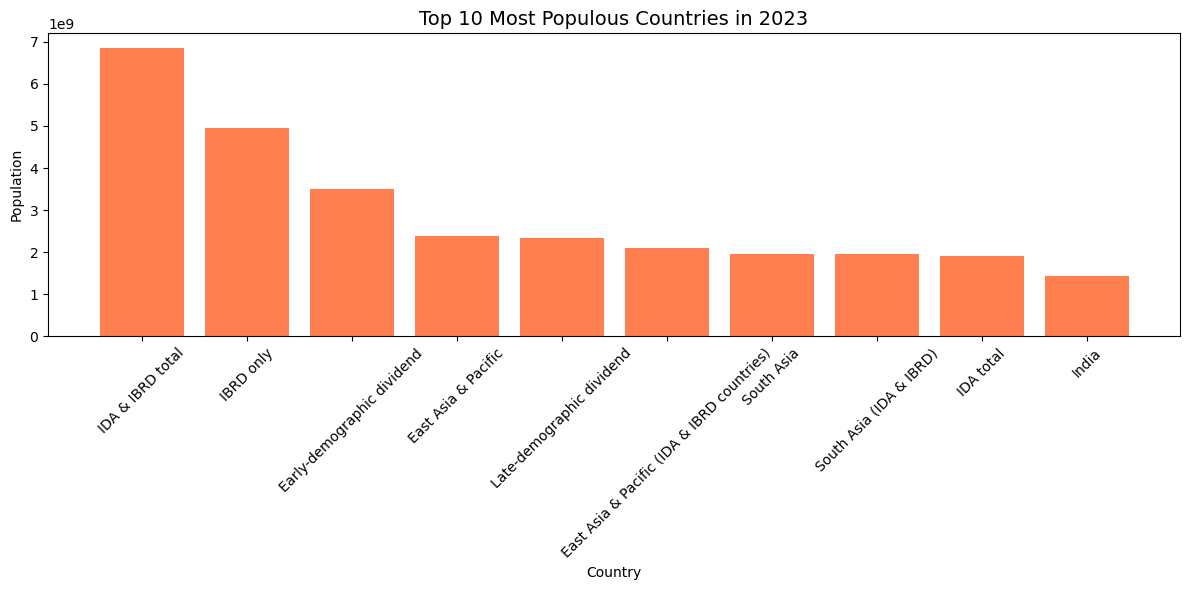

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the full path to the CSV file
file_path = "C:/Users/asus/Downloads/Task_01.csv"

# Step 2: Read the dataset, skipping metadata rows
df = pd.read_csv(file_path, skiprows=4)
df.columns = df.columns.str.strip()

# Step 3: Identify valid year columns
year_columns = [col for col in df.columns if col.isdigit()]
year_columns = sorted(year_columns, key=int, reverse=True)

# Step 4: Try each year until valid population data is found
for year in year_columns:
    df_filtered = df[['Country Name', year]].copy()
    df_filtered.columns = ['Country', 'Population']
    df_filtered['Population'] = pd.to_numeric(df_filtered['Population'], errors='coerce')
    
    # Filter out rows with missing or zero population
    df_filtered = df_filtered.dropna()
    df_filtered = df_filtered[df_filtered['Population'] > 0]
    
    # Optional: exclude region-level entries (they often contain 'income' or 'world')
    df_filtered = df_filtered[~df_filtered['Country'].str.contains('income|World', case=False)]
    
    if len(df_filtered) >= 10:
        latest_year = year
        break

# Step 5: Get top 10 countries by population
top10 = df_filtered.sort_values(by='Population', ascending=False).head(10)

# Step 6: Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top10['Country'], top10['Population'], color='coral')
plt.title(f'Top 10 Most Populous Countries in {latest_year}', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()